In [202]:
import pandas as pd 
import numpy as np
import datetime

pd.set_option('display.max_columns', None)

In [203]:
#load data
df = pd.read_csv('../../data/127000_rand.csv')

In [204]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN


## Flights Table: Processing

### Row Reduction

In [205]:
def remove_rows(df):
    """
    remove outlier rows and certain null values
        - arr_delay outliers above 350
        - arr_delay where null
    """

    df = df.loc[(df['arr_delay'].notnull()) | (df['arr_delay'] <= 350)]


    return df

In [206]:
df = remove_rows(df)

In [207]:
df.shape

(125019, 42)

### create datetime columns

In [208]:
def create_datetime(df):
    """
    creates columns for month, year, hour onto the dataframe
    """
    df['month'] = pd.DatetimeIndex(df['fl_date']).month
    df['year'] = pd.DatetimeIndex(df['fl_date']).year
    df['day'] = pd.DatetimeIndex(df['fl_date']).dayofweek
    df['dep_hour'] = df['crs_dep_time'].round(-2)/100
    df['arr_hour']= df['crs_arr_time'].round(-2)/100

    return df


In [209]:
create_datetime(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,20.0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,22.0,0.0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,12.0
5,2018-06-07,DL,DL,DL,2461,DL,N323US,2461,12339,IND,"Indianapolis, IN",11433,DTW,"Detroit, MI",1542,1538.0,-4.0,10.0,1548.0,1629.0,11.0,1650,1640.0,-10.0,0,NaN,0,N,68,62.0,41.0,1,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,15.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,-13.0,12.0,1654.0,1640.0,14.0,1705,1654.0,-11.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,17.0,17.0
127476,2018-06-07,DL,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,13.0
127477,2018-06-07,DL,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,-2.0,13.0,1801.0,1906.0,5.0,1938,1911.0,-27.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,19.0
127478,2018-06-07,DL,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,13.0,19.0


### Create is_late column

In [211]:
def create_is_late(df):
    """
    creates a column 0/1 to indicate if the flight was late or not
    """
    df['is_late'] = df['arr_delay'].apply(lambda x: 1 if x > 0 else 0)

    return df

In [212]:
create_is_late(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,20.0,0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,22.0,0.0,0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,12.0,1
5,2018-06-07,DL,DL,DL,2461,DL,N323US,2461,12339,IND,"Indianapolis, IN",11433,DTW,"Detroit, MI",1542,1538.0,-4.0,10.0,1548.0,1629.0,11.0,1650,1640.0,-10.0,0,NaN,0,N,68,62.0,41.0,1,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,15.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,-13.0,12.0,1654.0,1640.0,14.0,1705,1654.0,-11.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,17.0,17.0,0
127476,2018-06-07,DL,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,13.0,1
127477,2018-06-07,DL,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,-2.0,13.0,1801.0,1906.0,5.0,1938,1911.0,-27.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,19.0,0
127478,2018-06-07,DL,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,13.0,19.0,1


### Create Speed Column

In [213]:
def create_speed(df):
    """
    create column calculating expected speed of flight. miles/minute
    """
    df['speed'] = (df['distance'] / df['crs_elapsed_time']).round(2)

    return df

In [214]:
create_speed(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,20.0,0,5.40
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,22.0,0.0,0,5.78
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,12.0,1,3.27
5,2018-06-07,DL,DL,DL,2461,DL,N323US,2461,12339,IND,"Indianapolis, IN",11433,DTW,"Detroit, MI",1542,1538.0,-4.0,10.0,1548.0,1629.0,11.0,1650,1640.0,-10.0,0,NaN,0,N,68,62.0,41.0,1,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,15.0,16.0,0,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,-13.0,12.0,1654.0,1640.0,14.0,1705,1654.0,-11.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,17.0,17.0,0,2.53
127476,2018-06-07,DL,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,13.0,1,6.20
127477,2018-06-07,DL,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,-2.0,13.0,1801.0,1906.0,5.0,1938,1911.0,-27.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,19.0,0,6.87
127478,2018-06-07,DL,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,13.0,19.0,1,7.01


### Transform: 0 any Early flight in column arr_delay

In [215]:
def transform_early_flights(df):
    """
    makes any departure & arrival delays < 0 into 0
    """

    df['arr_delay'] = df['arr_delay'].apply(lambda x: x if x > 0 else 0)
    df['dep_delay'] = df['dep_delay'].apply(lambda x: x if x > 0 else 0)


    return df

In [216]:
transform_early_flights(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,0.0,22.0,1846.0,2012.0,10.0,2034,2022.0,0.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,20.0,0,5.40
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,0.0,21.0,2245.0,29.0,3.0,41,32.0,0.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,22.0,0.0,0,5.78
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,12.0,1,3.27
5,2018-06-07,DL,DL,DL,2461,DL,N323US,2461,12339,IND,"Indianapolis, IN",11433,DTW,"Detroit, MI",1542,1538.0,0.0,10.0,1548.0,1629.0,11.0,1650,1640.0,0.0,0,NaN,0,N,68,62.0,41.0,1,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,15.0,16.0,0,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,0.0,12.0,1654.0,1640.0,14.0,1705,1654.0,0.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,17.0,17.0,0,2.53
127476,2018-06-07,DL,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,13.0,1,6.20
127477,2018-06-07,DL,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,0.0,13.0,1801.0,1906.0,5.0,1938,1911.0,0.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,19.0,0,6.87
127478,2018-06-07,DL,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,13.0,19.0,1,7.01


## Creation of Airports Stats Table

In [217]:
def create_table_airports(df):
    """
    input flights table and create a unique airports table with stats that will be used for features later
    """
    df_airports = df.copy()
    df_airports = df[['origin_airport_id', 'origin', 'origin_city_name']]
    df_airports = df_airports.drop_duplicates(subset=['origin_airport_id'])
    df_airports.rename(columns={'origin_airport_id': 'airport_id', 'origin':'airport_code'}, inplace=True)
    split = df_airports['origin_city_name'].str.split(",", n=1, expand=True)
    df_airports['city'] = split[0]
    df_airports['state'] = split[1]
    df_airports.drop('origin_city_name', axis=1, inplace=True)
    
    return df_airports

In [218]:
df_airports = create_table_airports(df)
df_airports

,airport_id,airport_code,city,state
1,11042,CLE,Cleveland,OH
2,12953,LGA,New York,NY
3,10397,ATL,Atlanta,GA
4,14771,SFO,San Francisco,CA
5,12339,IND,Indianapolis,IN
...,...,...,...,...
81669,11336,DLG,Dillingham,AK
87262,10590,IFP,Bullhead City,AZ
105202,13829,OGD,Ogden,UT
109120,12250,HYA,Hyannis,MA


### Create mean departure delay column

In [219]:
def create_dep_delay(df_flights, df_airports):
    """
    creates a column showing mean departure delay for each airport
    we used mean because previously have 0d out any negatives and medium results in 0 99% of the time
    """
    airports_temp = pd.DataFrame(df_flights.groupby('origin_airport_id').agg('mean')['dep_delay'])
    airports_temp['dep_delay'] = airports_temp['dep_delay'].round(2)
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'origin_airport_id':'airport_id'}, inplace=True)

    df_airports = df_airports.merge(airports_temp, on='airport_id')
    df_airports.rename(columns={'dep_delay':'mean_d_delay'}, inplace=True)

    return df_airports


In [220]:
df_airports = create_dep_delay(df, df_airports)

In [221]:
df_airports

,airport_id,airport_code,city,state,mean_d_delay
0,11042,CLE,Cleveland,OH,15.02
1,12953,LGA,New York,NY,18.40
2,10397,ATL,Atlanta,GA,11.24
3,14771,SFO,San Francisco,CA,15.76
4,12339,IND,Indianapolis,IN,15.71
...,...,...,...,...,...
369,11336,DLG,Dillingham,AK,0.00
370,10590,IFP,Bullhead City,AZ,1.00
371,13829,OGD,Ogden,UT,10.00
372,12250,HYA,Hyannis,MA,56.00


### Create mean arrival delay column

In [222]:
def create_arr_delay(df_flights, df_airports):
    """
    creates a column showing mean arrival delay for each airport
    we used mean because previously have 0d out any negatives and medium results in 0 99% of the time
    """
    airports_temp = pd.DataFrame(df_flights.groupby('dest_airport_id').agg('mean')['arr_delay'])
    airports_temp['arr_delay'] = airports_temp['arr_delay'].round(2)
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'dest_airport_id':'airport_id'}, inplace=True)

    df_airports = df_airports.merge(airports_temp, on='airport_id')
    df_airports.rename(columns={'arr_delay':'mean_arr_delay'}, inplace=True)

    return df_airports

In [223]:
df_airports = create_arr_delay(df, df_airports)
df_airports

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay
0,11042,CLE,Cleveland,OH,15.02,13.70
1,12953,LGA,New York,NY,18.40,19.27
2,10397,ATL,Atlanta,GA,11.24,10.45
3,14771,SFO,San Francisco,CA,15.76,20.24
4,12339,IND,Indianapolis,IN,15.71,13.09
...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50
367,11336,DLG,Dillingham,AK,0.00,0.00
368,10590,IFP,Bullhead City,AZ,1.00,0.00
369,13829,OGD,Ogden,UT,10.00,0.00


### Create Departure Flight Count

In [224]:
def create_flight_counts(df_flights, df_airports):
    """
    add columns counting amount of flights in and out of the airports
    this will then be used to calculate a column about % delayed 
    """
    airports_temp = pd.DataFrame(df_flights.groupby('origin_airport_id').count()['flights'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'origin_airport_id':'airport_id', 'flights':'dep_flight_count'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')
    
    airports_temp = pd.DataFrame(df_flights.groupby('dest_airport_id').count()['flights'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'dest_airport_id':'airport_id', 'flights':'arr_flight_count'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')    
    
    return df_airports

In [225]:
df_airports = create_flight_counts(df, df_airports)

In [226]:
df_airports

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay,dep_flight_count,arr_flight_count
0,11042,CLE,Cleveland,OH,15.02,13.70,799,840
1,12953,LGA,New York,NY,18.40,19.27,2658,2602
2,10397,ATL,Atlanta,GA,11.24,10.45,6299,6267
3,14771,SFO,San Francisco,CA,15.76,20.24,2728,2743
4,12339,IND,Indianapolis,IN,15.71,13.09,806,800
...,...,...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50,3,4
367,11336,DLG,Dillingham,AK,0.00,0.00,3,1
368,10590,IFP,Bullhead City,AZ,1.00,0.00,1,1
369,13829,OGD,Ogden,UT,10.00,0.00,1,3


### Create Count of is_late Column

In [227]:
def create_delay_counts(df_flights, df_airports):
    """
    create columns counting number of flights lates for depart and arrival airports
    """
    airports_temp = pd.DataFrame(df_flights.groupby(by='origin_airport_id').agg('sum')['is_late'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'origin_airport_id':'airport_id', 'is_late':'dep_late_count'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')

    airports_temp = pd.DataFrame(df_flights.groupby(by='dest_airport_id').agg('sum')['is_late'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'dest_airport_id':'airport_id', 'is_late':'arr_late_count'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')

    return df_airports

In [228]:
df_airports = create_delay_counts(df, df_airports)
df_airports

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay,dep_flight_count,arr_flight_count,dep_late_count,arr_late_count
0,11042,CLE,Cleveland,OH,15.02,13.70,799,840,273,272
1,12953,LGA,New York,NY,18.40,19.27,2658,2602,963,997
2,10397,ATL,Atlanta,GA,11.24,10.45,6299,6267,1960,1808
3,14771,SFO,San Francisco,CA,15.76,20.24,2728,2743,1015,1096
4,12339,IND,Indianapolis,IN,15.71,13.09,806,800,277,309
...,...,...,...,...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50,3,4,2,2
367,11336,DLG,Dillingham,AK,0.00,0.00,3,1,1,0
368,10590,IFP,Bullhead City,AZ,1.00,0.00,1,1,1,0
369,13829,OGD,Ogden,UT,10.00,0.00,1,3,1,0


### Create % late Columns

In [229]:
def create_late_per(df_airports):
    """
    creates columns showing percent late for arrival and departing airports
    """
    df_airports['dep_late_perc'] = (df_airports['dep_late_count'] / df_airports['dep_flight_count']).round(3)
    df_airports['arr_late_perc'] = (df_airports['arr_late_count'] / df_airports['arr_flight_count']).round(3)

    return df_airports

In [230]:
create_late_per(df_airports)

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay,dep_flight_count,arr_flight_count,dep_late_count,arr_late_count,dep_late_perc,arr_late_perc
0,11042,CLE,Cleveland,OH,15.02,13.70,799,840,273,272,0.342,0.324
1,12953,LGA,New York,NY,18.40,19.27,2658,2602,963,997,0.362,0.383
2,10397,ATL,Atlanta,GA,11.24,10.45,6299,6267,1960,1808,0.311,0.288
3,14771,SFO,San Francisco,CA,15.76,20.24,2728,2743,1015,1096,0.372,0.400
4,12339,IND,Indianapolis,IN,15.71,13.09,806,800,277,309,0.344,0.386
...,...,...,...,...,...,...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50,3,4,2,2,0.667,0.500
367,11336,DLG,Dillingham,AK,0.00,0.00,3,1,1,0,0.333,0.000
368,10590,IFP,Bullhead City,AZ,1.00,0.00,1,1,1,0,1.000,0.000
369,13829,OGD,Ogden,UT,10.00,0.00,1,3,1,0,1.000,0.000


## Create Tail Number Stats Table

In [232]:
def create_tail_table(df_flights):
    """
    creates tabel with tail number stats from flights table
    """
    df_tail = df_flights[['tail_num', 'fl_date', 'is_late', 'arr_delay', 'arr_time', 'distance', 'carrier_delay', 
                          'late_aircraft_delay', 'weather_delay']].groupby(by='tail_num').agg({'fl_date':'count', 
                                                                                               'is_late':'sum', 
                                                                                               'arr_delay':['median', 'mean', 'std'],
                                                                                               'arr_time':['median', 'mean'],
                                                                                               'distance':'mean',
                                                                                               'carrier_delay':'count',
                                                                                               'late_aircraft_delay':'count',
                                                                                               'weather_delay':'count'})
    df_tail['late_perc'] = (df_tail['is_late']['sum'] / df_tail['fl_date']['count']).round(3)


    return df_tail



In [233]:
df_tail = create_tail_table(df)
df_tail

fl_date is_late arr_delay                       arr_time  \
           count     sum    median       mean        std   median   
tail_num                                                            
215NV         18       6       0.0  23.444444  67.253010   1768.0   
216NV         22       9       0.0  14.772727  38.675613   1245.5   
217NV         19       9       0.0  32.421053  72.701304   1251.0   
218NV         13       8       5.0  12.461538  17.491023   1557.0   
219NV         27       9       0.0   5.333333  10.019212   1335.0   
...          ...     ...       ...        ...        ...      ...   
N998JB         5       3      29.0  33.200000  34.636686   1720.0   
N998JE         4       0       0.0   0.000000   0.000000   1440.0   
N998NN        21       9       0.0  14.952381  41.806072   1415.0   
N999DN        30       6       0.0  19.733333  70.183471   1572.0   
N999JQ         3       0       0.0   0.000000   0.000000    909.0   

                          distance carrier_delay late_aircraft_delay  \
                 mean         mean         count               count   
tail_num                                                               
215NV     1683.000000   887.500000             4                   4   
216NV     1373.772727   808.454545             5                   5   
217NV     1322.736842   938.105263             3                   3   
218NV     1589.692308   805.923077             4                   4   
219NV     1453.851852   788.000000             5                   5   
...               ...          ...           ...                 ...   
N998JB    1444.000000  1120.400000             3                   3   
N998JE    1476.250000  1241.000000             0                   0   
N998NN    1386.904762  1230.095238             4                   4   
N999DN    1488.100000   465.133333             5                   5   
N999JQ    1151.666667  1203.000000             0                   0   

         weather_delay late_perc  
                 count            
tail_num                          
215NV                4     0.333  
216NV                5     0.409  
217NV                3     0.474  
218NV                4     0.615  
219NV                5     0.333  
...                ...       ...  
N998JB               3     0.600  
N998JE               0     0.000  
N998NN               4     0.429  
N999DN               5     0.200  
N999JQ               0     0.000  

[6222 rows x 12 columns]

## Create Carrier Stats Table

In [334]:
def create_carrier_table(df_flights):
    """
    creates tabel with carrier stats from flights table
    """
    df_carrier = df_flights[['mkt_carrier', 'fl_date', 'is_late', 
                             'dep_delay', 'arr_delay', 'carrier_delay']].groupby(by='mkt_carrier').agg({'fl_date':'count',
                                                                                           'is_late':'sum',
                                                                                           'dep_delay': 'mean',
                                                                                           'arr_delay': 'mean',
                                                                                           'carrier_delay': 'mean'})
    df_carrier['late_perc'] = (df_carrier['is_late'] / df_carrier['fl_date']).round(3)
    df_carrier['carrier_delay'] = df_carrier['carrier_delay'].round(2)
    df_carrier['dep_delay'] = df_carrier['dep_delay'].round(2)
    df_carrier['arr_delay'] = df_carrier['arr_delay'].round(2)

    return df_carrier

In [342]:
df_carrier = create_carrier_table(df)
df_carrier 

,fl_date,is_late,dep_delay,arr_delay,carrier_delay,late_perc
mkt_carrier,,,,,,
AA,32325,11898,13.62,14.40,20.40,0.368
AS,6578,2338,8.18,9.32,14.96,0.355
B6,4754,1926,21.31,21.38,26.01,0.405
DL,27900,8123,12.31,12.33,24.23,0.291
F9,1992,864,21.30,20.73,21.44,0.434
G4,1630,614,15.34,15.92,26.13,0.377
HA,1404,500,5.48,6.53,23.46,0.356
NK,3061,981,12.06,12.26,15.49,0.320
UA,24089,8723,16.53,17.69,21.73,0.362


In [340]:
df_carrier.sort_values(by='fl_date', ascending=False)[0:4]
#maybe come back and bin the carriers by size

,fl_date,is_late,dep_delay,arr_delay,carrier_delay,late_perc
mkt_carrier,,,,,,
AA,32325,11898,13.62,14.40,20.40,0.368
DL,27900,8123,12.31,12.33,24.23,0.291
UA,24089,8723,16.53,17.69,21.73,0.362
WN,21152,7901,12.36,10.95,16.04,0.374


## Hourly Stats

In [254]:
def create_hourly_table(df_flights):
    """
    creates tabel with hourly stats from flights table
    """
    df_hours = df_flights[['dep_hour', 'fl_date', 'is_late', 
                             'dep_delay', 'arr_delay']].groupby(by='dep_hour').agg({'fl_date':'count',
                                                                                           'is_late':'sum',
                                                                                           'dep_delay': 'mean',
                                                                                           'arr_delay': 'mean'})
    df_hours['late_perc'] = (df_hours['is_late'] / df_hours['fl_date']).round(3)
    df_hours['dep_delay'] = df_hours['dep_delay'].round(2)
    df_hours['arr_delay'] = df_hours['arr_delay'].round(2)
    
    #bucket carrier category as orginal

    return df_hours

In [255]:
df_hourly = create_hourly_table(df)
df_hourly

,fl_date,is_late,dep_delay,arr_delay,late_perc
dep_hour,,,,,
0.0,203,58,10.68,9.06,0.286
1.0,150,41,14.01,13.04,0.273
2.0,36,16,21.31,19.83,0.444
3.0,28,10,29.75,27.64,0.357
4.0,25,10,25.16,21.96,0.400
5.0,2406,527,6.70,7.85,0.219
6.0,9129,2171,6.45,7.46,0.238
7.0,7902,2146,8.17,9.28,0.272
8.0,8714,2547,8.40,9.41,0.292


## Merge all wanted attributes onto the main dataframe

In [258]:
df_merged = df.copy(deep=True)

### Airport Merge

In [272]:
def get_features_airport(df_flights, df_airports):
    """
    merges engineered features from the airport stats table onto the main dataframe as additional columns
    """
    airport_dep = df_airports[['airport_id', 'mean_d_delay', 'dep_late_perc']].rename(columns={'mean_d_delay':'air_mean_d_delay', 'dep_late_perc':'air_dep_late_perc'})
    airport_arr = df_airports[['airport_id', 'mean_arr_delay', 'arr_late_perc']].rename(columns={'mean_arr_delay':'air_mean_arr_delay', 'arr_late_perc':'air_arr_late_perc'})

    #merge each onto the main dataframe and rename

    df_temp = df_flights.merge(airport_dep, left_on='origin_airport_id', right_on='airport_id')
    df_temp = df_temp.merge(airport_arr, left_on='dest_airport_id', right_on='airport_id')
    df_temp.drop(['airport_id_x', 'airport_id_y'], axis = 1, inplace=True)

    return df_temp



In [274]:
df_merged = get_features_airport(df_merged, df_airports)
df_merged

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_mean_arr_delay,air_arr_late_perc
0,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43,15.02,0.342,10.45,0.288
1,2018-06-14,WN,WN,WN,2487,WN,N735SA,2487,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",715,714.0,0.0,10.0,724.0,846.0,9.0,905,855.0,0.0,0,NaN,0,N,110,101.0,82.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,7.0,9.0,0,5.04,15.02,0.342,10.45,0.288
2,2018-06-20,DL,DL,DL,2528,DL,N943DN,2528,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1455,1454.0,0.0,9.0,1503.0,1619.0,4.0,1642,1623.0,0.0,0,NaN,0,N,107,89.0,76.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,2,15.0,16.0,0,5.18,15.02,0.342,10.45,0.288
3,2018-06-28,NK,NK,NK,241,NK,N514NK,241,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",600,552.0,0.0,12.0,604.0,727.0,8.0,748,735.0,0.0,0,NaN,0,N,108,103.0,83.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,6.0,7.0,0,5.13,15.02,0.342,10.45,0.288
4,2019-11-02,DL,DL,DL,1158,DL,N905DL,1158,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1700,1655.0,0.0,8.0,1703.0,1833.0,17.0,1848,1850.0,2.0,0,NaN,0,N,108,115.0,90.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2019,5,17.0,18.0,1,5.13,15.02,0.342,10.45,0.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125007,2019-03-27,UA,UA_CODESHARE,UA,5102,OO,N479CA,5102,12519,JMS,"Jamestown, ND",11447,DVL,"Devils Lake, ND",1414,1348.0,0.0,17.0,1405.0,1432.0,5.0,1501,1437.0,0.0,0,NaN,0,N,47,49.0,27.0,1,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2019,2,14.0,15.0,0,1.77,52.93,0.533,24.33,0.444
125008,2018-11-05,UA,UA_CODESHARE,UA,5104,OO,N937EV,5104,12519,JMS,"Jamestown, ND",11447,DVL,"Devils Lake, ND",2314,2252.0,0.0,36.0,2328.0,2349.0,5.0,2359,2354.0,0.0,0,NaN,0,N,45,62.0,21.0,1,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2018,0,23.0,24.0,0,1.84,52.93,0.533,24.33,0.444
125009,2018-03-18,UA,UA_CODESHARE,UA,5104,OO,N970SW,5104,12519,JMS,"Jamestown, ND",11447,DVL,"Devils Lake, ND",2312,49.0,97.0,28.0,117.0,140.0,6.0,2359,146.0,107.0,0,NaN,0,N,47,57.0,23.0,1,83,97.0,0.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,3,2018,6,23.0,24.0,1,1.77,52.93,0.533,24.33,0.444
125010,2019-08-11,UA,UA_CODESHARE,UA,5102,OO,N417SW,5102,12519,JMS,"Jamestown, ND",11447,DVL,"Devils Lake, ND",1410,1414.0,4.0,15.0,1429.0,1456.0,3.0,1451,1459.0,8.0,0,NaN,0,N,41,45.0,27.0,1,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2019,6,14.0,15.0,1,2.02,52.93,0.533,24.33,0.444


### Hourly Merge

In [288]:
def merge_hourly(df_flights, df_hourly):
    """
    merges engineered features from the hourly stats table onto the main dataframe as additional columns
    """
    hourly_filter = df_hourly.reset_index()[['dep_hour', 'fl_date', 
                                             'arr_delay', 'late_perc']].rename(columns={'fl_date':'hour_count', 
                                                                                        'arr_delay':'hour_arr_delay',
                                                                                        'late_perc':'hour_late_perc'})
    df_temp = df_flights.merge(hourly_filter, left_on='dep_hour', right_on='dep_hour')
    #df_temp.drop(['airport_id_x', 'airport_id_y'], axis = 1, inplace=True)

    return df_temp


    

In [290]:
df_merged = merge_hourly(df_merged, df_hourly)
df_merged.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_mean_arr_delay,air_arr_late_perc,hour_count,hour_arr_delay,hour_late_perc
0,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43,15.02,0.342,10.45,0.288,8222,10.5,0.31
1,2019-04-05,DL,DL,DL,2365,DL,N928DN,2365,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1037.0,0.0,10.0,1047.0,1208.0,6.0,1224,1214.0,0.0,0,NaN,0,N,103,97.0,81.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2019,4,10.0,12.0,0,5.38,15.02,0.342,10.45,0.288,8222,10.5,0.31
2,2018-01-07,DL,DL,DL,2232,DL,N923DL,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1050,1104.0,14.0,20.0,1124.0,1250.0,7.0,1246,1257.0,11.0,0,NaN,0,N,116,113.0,86.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,6,10.0,12.0,1,4.78,15.02,0.342,10.45,0.288,8222,10.5,0.31
3,2018-11-06,DL,DL,DL,2232,DL,N976DL,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1049,1049.0,0.0,12.0,1101.0,1231.0,13.0,1229,1244.0,15.0,0,NaN,0,N,100,115.0,90.0,1,554,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,11,2018,1,10.0,12.0,1,5.54,15.02,0.342,10.45,0.288,8222,10.5,0.31
4,2018-06-03,DL,DL,DL,2232,DL,N918DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1033.0,0.0,10.0,1043.0,1159.0,5.0,1223,1204.0,0.0,0,NaN,0,N,102,91.0,76.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,6,10.0,12.0,0,5.43,15.02,0.342,10.45,0.288,8222,10.5,0.31


### Merge Tail Num Stats

In [ ]:
# we need to flattern the table of tail to m,ake it easier... whoops
test = list(df_tail.columns.map('_'.join))
test
df_tail.columns = test
df_tail

In [331]:
def merge_tail(df_flights, df_tail):
    """
    merges engineered features from the Tail Num stats table onto the main dataframe as additional columns
    """
    tail_filter = df_tail.reset_index()[['tail_num', 'fl_date_count', 'arr_delay_mean', 'arr_delay_std', 'late_perc_']]
    tail_filter.rename(columns={'fl_date_count':'tail_count', 'arr_delay_mean':'tail_arr_delay','arr_delay_std':'tail_arr_delay_std' , 'late_perc_':'tail_late_perc'}, inplace=True)
    tail_filter['tail_arr_delay'] = tail_filter['tail_arr_delay'].round(2)
    tail_filter['tail_arr_delay_std'] = tail_filter['tail_arr_delay_std'].round(2)
    tail_filter.drop('tail_arr_delay_std', axis=1, inplace=True)

    df_output = df_flights.merge(tail_filter, left_on='tail_num', right_on='tail_num')

    return df_output

In [333]:
df_merged = merge_tail(df_merged, df_tail)
df_merged.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_mean_arr_delay,air_arr_late_perc,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc
0,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43,15.02,0.342,10.45,0.288,8222,10.50,0.310,22,4.45,0.273
1,2019-06-05,DL,DL,DL,1379,DL,N912DE,1379,10397,ATL,"Atlanta, GA",10599,BHM,"Birmingham, AL",1050,1056.0,6.0,14.0,1110.0,1037.0,4.0,1042,1041.0,0.0,0,NaN,0,N,52,45.0,27.0,1,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,2,10.0,10.0,0,2.58,11.24,0.311,19.68,0.400,8222,10.50,0.310,22,4.45,0.273
2,2018-05-12,DL,DL,DL,2575,DL,N912DE,2575,10994,CHS,"Charleston, SC",10397,ATL,"Atlanta, GA",600,551.0,0.0,16.0,607.0,648.0,6.0,707,654.0,0.0,0,NaN,0,N,67,63.0,41.0,1,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2018,5,6.0,7.0,0,3.87,18.77,0.293,10.45,0.288,9129,7.46,0.238,22,4.45,0.273
3,2018-03-27,DL,DL,DL,1781,DL,N912DE,1781,10980,CHA,"Chattanooga, TN",10397,ATL,"Atlanta, GA",600,556.0,0.0,14.0,610.0,634.0,7.0,658,641.0,0.0,0,NaN,0,N,58,45.0,24.0,1,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2018,1,6.0,7.0,0,1.83,8.40,0.283,10.45,0.288,9129,7.46,0.238,22,4.45,0.273
4,2019-07-15,DL,DL,DL,1983,DL,N912DE,1983,14685,SAV,"Savannah, GA",10397,ATL,"Atlanta, GA",1659,1656.0,0.0,10.0,1706.0,1742.0,10.0,1807,1752.0,0.0,0,NaN,0,N,68,56.0,36.0,1,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2019,0,17.0,18.0,0,3.15,15.11,0.305,10.45,0.288,7436,18.94,0.418,22,4.45,0.273


### Merge Carrier

In [343]:
df_carrier

,fl_date,is_late,dep_delay,arr_delay,carrier_delay,late_perc
mkt_carrier,,,,,,
AA,32325,11898,13.62,14.40,20.40,0.368
AS,6578,2338,8.18,9.32,14.96,0.355
B6,4754,1926,21.31,21.38,26.01,0.405
DL,27900,8123,12.31,12.33,24.23,0.291
F9,1992,864,21.30,20.73,21.44,0.434
G4,1630,614,15.34,15.92,26.13,0.377
HA,1404,500,5.48,6.53,23.46,0.356
NK,3061,981,12.06,12.26,15.49,0.320
UA,24089,8723,16.53,17.69,21.73,0.362


In [344]:
def merge_carrier(df_flights, df_carrier):
    carrier_filter = df_carrier.reset_index()

    return carrier_filter

In [ ]:
merge

## Scrap

### Correlation Matrix against arr_delay.... 
lets come back and do this after we have joined all the stats

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
df_corr = df.copy()
df_corr = df_corr[['arr_delay', 'air_time', 'crs_elapsed_time', 'speed', 'distance']]

In [141]:
# create focused datafame for this
df_corr.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,is_late,speed
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,0,5.43
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,0.0,22.0,1846.0,2012.0,10.0,2034,2022.0,0.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,0,5.40


<AxesSubplot:>

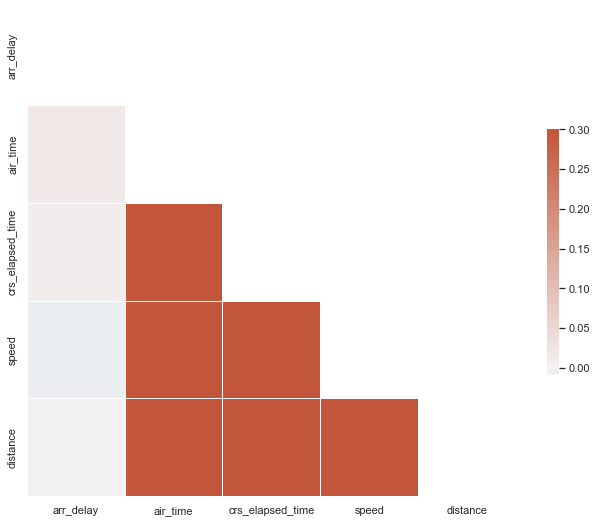

In [143]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})